In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable

%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass as ec
import tools
import math_functions as mf
import BodeClass as bc_ECS
import BodeClass_PSI as bc_PSI
import DREAM_colors as dc


In [2]:
importlib.reload(ec)
importlib.reload(tools)
importlib.reload(mf)
importlib.reload(bc_ECS)
importlib.reload(bc_PSI)
importlib.reload(dc)


<module 'DREAM_colors' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\DREAM_colors.py'>

In [3]:
folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Apresentaçoes/20230926_IBPC_ENS_Ladi/"

ECS = pd.read_csv(folder + "bode_ECS_data.csv")
PSI = pd.read_csv(folder + "bode_PSI_data.csv")

In [5]:
ECS

,Frequency,Amplitude,Std
0,128.000000,748.959899,149.194334
1,64.000000,1612.929564,201.843933
2,32.000000,2784.018779,390.536320
3,16.000000,5441.027167,1597.845036
4,8.000000,10089.807322,2454.408928
5,4.000000,11818.022382,1130.765955
6,2.000000,18497.653651,1468.653703
7,1.000000,26738.366222,7691.614519
8,0.500000,23759.185998,4741.600123
9,0.250000,19974.908345,8259.623435


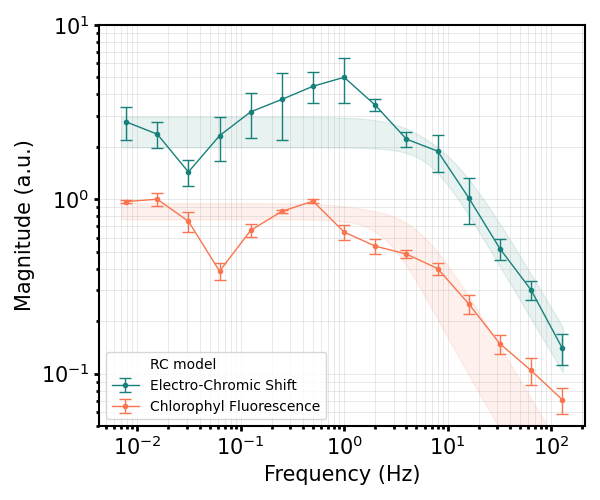

In [16]:
marker = 3
format = '-o'

green = dc.colors.rgb.iloc[2]
orange = dc.colors.rgb.iloc[6]

fig, ax = plt.subplots(figsize=(6,5))
#fig.suptitle("Comparioson of ECS and fluorescence", fontsize=14)
ax.errorbar(ECS.Frequency, ECS.Amplitude/(0.2*max(ECS.Amplitude)), fmt = format, markersize = marker, linewidth = 1, color = green, yerr=ECS.Std/(0.2*max(ECS.Amplitude)), capsize=4, label = "Electro-Chromic Shift")
ax = tools.plot_model(ax, "RC",ECS.Frequency, ECS.Amplitude/(0.2*max(ECS.Amplitude)), sigma = ECS.Std/(0.2*max(ECS.Amplitude)), color = green, label = True, line = 0, alpha = 0.1)
ax = tools.plot_model(ax, "RC",PSI.Frequency, PSI.Amplitude/max(PSI.Amplitude), sigma = PSI.Std/max(PSI.Amplitude), color = orange, label = False, line = 0, alpha = 0.1)
ax.errorbar(PSI.Frequency, PSI.Amplitude/max(PSI.Amplitude), fmt = format, markersize = marker, linewidth = 1, color = orange, yerr=PSI.Std/max(PSI.Amplitude), capsize=4, label = "Chlorophyl Fluorescence")

ax = tools.bode_plot_axes(ax)
ax.set_ylim(5e-2, 1e1)

fig.tight_layout()
fig.savefig(f"{folder}/compare_ECS_FLUO.png", dpi=400)

In [5]:
fluo_phase_fund = np.load(folder + "fluo_phase_fund.npy")
fluo_phase_fund_std = np.load(folder + "fluo_phase_fund_std.npy")

ECS_phase_fund = np.load(folder + "ECS_phase_mean.npy")
ECS_phase_fund_std = np.load(folder + "ECS_phase_std.npy")

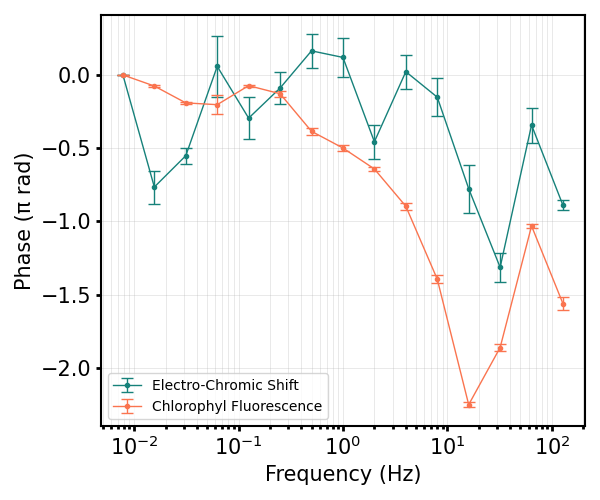

In [6]:
fig, ax = plt.subplots(figsize=(6,5))
ax.errorbar(ECS.Frequency, ECS_phase_fund/np.pi -1, fmt = format, markersize = marker, linewidth = 1, color = green, yerr=ECS_phase_fund_std/np.pi, capsize=4, label = "Electro-Chromic Shift")
ax.errorbar(PSI.Frequency, fluo_phase_fund/np.pi -1, fmt = format, markersize = marker, linewidth = 1, color = orange, yerr=fluo_phase_fund_std/np.pi, capsize=4, label = "Chlorophyl Fluorescence")

ax = tools.bode_plot_axes_phase(ax)
fig.tight_layout()
fig.savefig(f"{folder}/phase_fluo.png", dpi=400)

In [7]:
ECS_phase_fund

array([ 0.34583403,  2.06734305, -0.98262702,  0.70307794,  2.66487495,
        3.2114806 ,  1.70866822,  3.51719579,  3.65791595,  2.86025965,
        2.21544742,  3.32526469,  1.40954783,  0.73878315,  3.14159265])

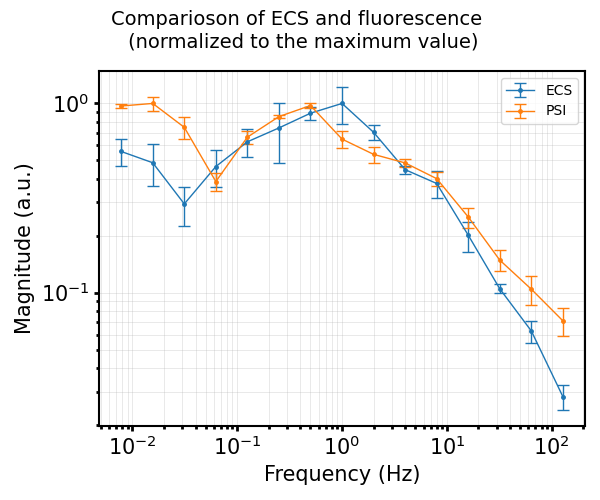

In [8]:
marker = 2.5

fig, ax = plt.subplots(figsize=(6,5))
fig.suptitle("Comparioson of ECS and fluorescence \n (normalized to the maximum value)", fontsize=14)
ax.errorbar(ECS.Frequency, ECS.Amplitude/ECS.Amplitude.max(), fmt ='o', markersize = marker, linestyle = '-', linewidth = 1, yerr=ECS.Std/ECS.Amplitude.max(), capsize=4, label = "ECS")
ax.errorbar(PSI.Frequency, PSI.Amplitude/PSI.Amplitude.max(), fmt ='o', markersize = marker, linestyle = '-', linewidth = 1, yerr=PSI.Std/PSI.Amplitude.max(), capsize=4, label = "PSI")

ax = tools.bode_plot_axes(ax)
#ax.set_ylim(1e-1, 5e0)

fig.tight_layout()
fig.savefig(f"{folder}/compare_ECS_FLUO_norm.png", dpi=300)

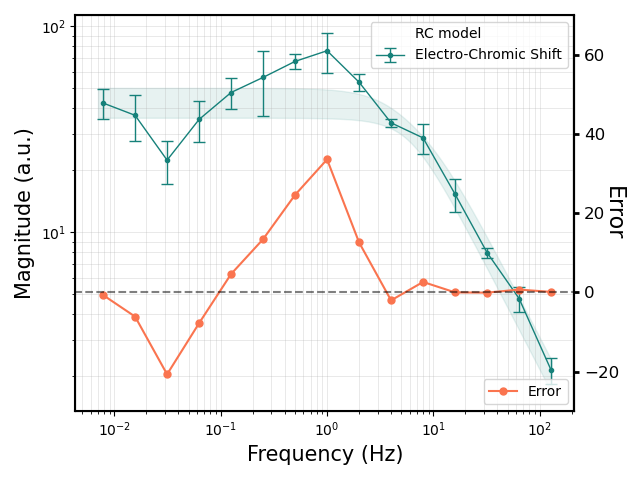

In [78]:
marker = 3
format = '-o'

green = dc.colors.rgb.iloc[2]
orange = dc.colors.rgb.iloc[6]

fig, ax = plt.subplots()
#fig.suptitle("Comparioson of ECS and fluorescence", fontsize=14)
ax.errorbar(ECS.Frequency, ECS.Amplitude, fmt = format, markersize = marker, linewidth = 1, color = green, yerr=ECS.Std, capsize=4, label = "Electro-Chromic Shift")
ax, popt = tools.plot_model(ax, "RC",ECS.Frequency, ECS.Amplitude, sigma = ECS.Std, color = green, label = True, line = 0, alpha = 0.1, Return_params = True)

err = ECS.Amplitude - mf.RC_transfer(ECS.Frequency, *popt)
ax2 = ax.twinx()
ax2.plot(ECS.Frequency, err, '-o', markersize = 5, linewidth = 1.5, color = orange, label = "Error")
ax = tools.bode_plot_axes(ax)
ax.set_ylim(1e0, 1.1e2)
#ax[1].set_yscale("log")
ax2.set_ylim(-30, 70)
ax2.set_xscale("log")
lims = ax.get_xlim()
ax2.hlines(0, 1e-3, 1e3, color = 'k', linestyle = '--', alpha = 0.5)
ax2.set_xlim(lims)
ax2.legend(loc = 'lower right', fontsize = 10)
ax2.set_ylabel("Error", fontsize = 16, rotation = 270)
ax2.tick_params(axis='y', labelsize=12)
fig.tight_layout()
fig.savefig(f"{folder}/compare_ECS_error.png", dpi=400)

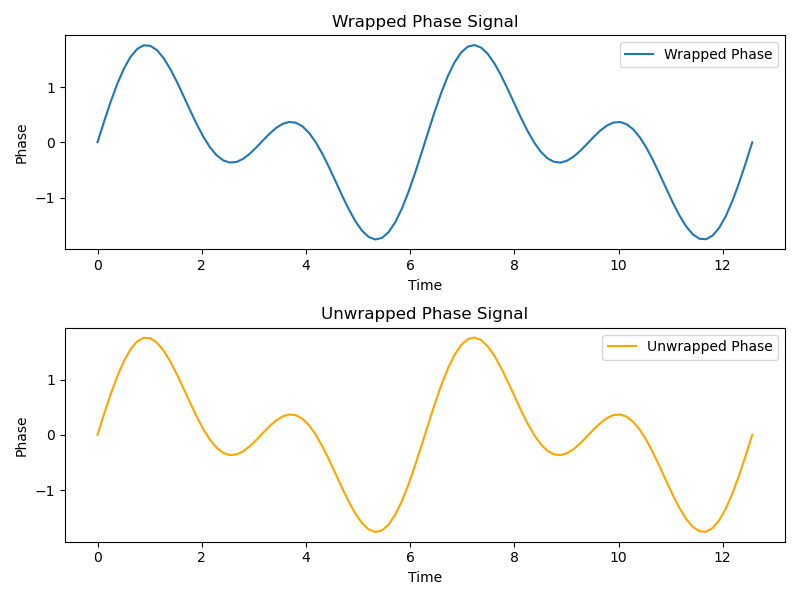

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a wrapped phase signal
t = np.linspace(0, 4*np.pi, 100)
wrapped_phase = np.sin(t) + np.sin(2*t)  # Wrapped phase signal

# Phase unwrapping function
def unwrap_phase(phase):
    unwrapped_phase = np.unwrap(phase)
    return unwrapped_phase

# Unwrap the phase
unwrapped_phase = unwrap_phase(wrapped_phase)

# Plotting the wrapped and unwrapped phases
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.plot(t, wrapped_phase, label='Wrapped Phase')
plt.title('Wrapped Phase Signal')
plt.xlabel('Time')
plt.ylabel('Phase')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, unwrapped_phase, label='Unwrapped Phase', color='orange')
plt.title('Unwrapped Phase Signal')
plt.xlabel('Time')
plt.ylabel('Phase')
plt.legend()

plt.tight_layout()
plt.show()
